In [17]:
import numpy as np
from PIL import Image
import operator
import sklearn.decomposition

In [18]:
class PCA():
    def __init__(self, d):
        self.d = d

    def train(self, X):
        X = np.array(X, dtype="float64")
        X = self.normalize(X)
        
        cov_matrix_t = X.T.dot(X)
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix_t) 
        eigen_values = eigen_values.tolist()
        eigen_vectors = X.dot(eigen_vectors)
        #eigen_vectors=eigen_vectors.T
        eigen_vectors = eigen_vectors.T.tolist()

        eigen_zip = [(value.real, vector) for value, vector in zip(eigen_values, eigen_vectors)]
        orderd_eigens = sorted(eigen_zip, key=operator.itemgetter(0), reverse=True)
        self.max_eigen_vectors = [orderd_eigens[i][1] for i in range(self.d)]
        self.W1 = np.real(np.array(self.max_eigen_vectors).T)        
        self.W = self.W1/np.sqrt(np.sum(self.W1**2, axis=0, keepdims=True))

    def normalize(self, X):
        self.mean_vector = 1.0 / X.shape[1] * np.sum(X, axis=1, keepdims=True)     
        self.std = np.std(X, axis=1, keepdims=True) + 10e-8
        X = (X-self.mean_vector) # /(self.std)
        return X

    def dim_reduction(self, X):
        return self.W.T.dot(X)

    def construct(self, F):
        return self.W.dot(F)

In [19]:
d = 20
num=165
path='./yaleface'
X = []
for n in range(1,num+1):
    img = Image.open('./yaleface/s'+str((n))+'.bmp')
    img = np.array(img).reshape(img.width*img.height)
    if n==1:
        first_img = img
    X.append(img)
X = np.array(X)

X = X.T
pca = PCA(d)
pca.train(X)   
for n in range(1,num+1):
    img = Image.open('./yaleface/s'+str((n))+'.bmp')
    w, h = img.width, img.height
    img = np.array(img).reshape(w*h, 1)
    img = img - pca.mean_vector # 去中心化
    features = pca.dim_reduction(img)#降维
    x_hat = pca.construct(features)#重构
    x_hat += pca.mean_vector #加上均值
    x_hat = x_hat.reshape(h, w)
    x_hat = np.array(x_hat, dtype="int32")
    new_img = Image.fromarray(x_hat).convert('L')
    new_img.save('./output/s'+ str(n)+'.png')
for i in range(d):
    W_all=pca.W1
    W_i=W_all[:,i].reshape(h, w)
    W_i=np.array(W_i, dtype="int32")
    w_img=Image.fromarray(W_i).convert('L')
    w_img.save('./output1/w'+ str(i+1)+'.png')
mean_img=pca.mean_vector.reshape(h, w)
mean_img=np.array(mean_img, dtype="int32")
mean_img=Image.fromarray(mean_img).convert('L')
mean_img.save('./output1/mean_img.png')

平均脸


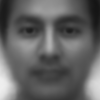

In [20]:
print('平均脸')
imgg=Image.open('./output1/mean_img.png')
display(imgg)

前20个特征向量所对应的图像


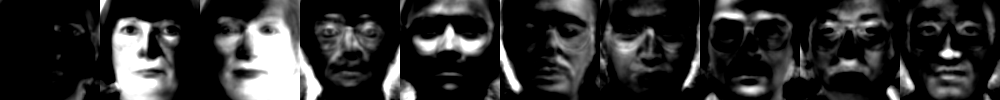

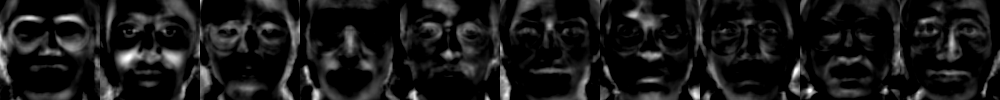

In [21]:
print('前20个特征向量所对应的图像')
ims = [Image.open('./output1/w'+str(i+1)+'.png') for i in range(10)]
width,height = ims[0].size
result1 = Image.new(ims[0].mode,(width*len(ims),height))
for j, im in enumerate(ims):
    result1.paste(im,box=(j*width,0))
display(result1)
ims = [Image.open('./output1/w'+str(i+11)+'.png') for i in range(10)]
width,height = ims[0].size
result1 = Image.new(ims[0].mode,(width*len(ims),height))
for j, im in enumerate(ims):
    result1.paste(im,box=(j*width,0))
display(result1)

降维前原始图片


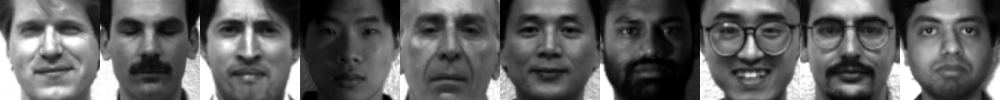

降维后重构图片


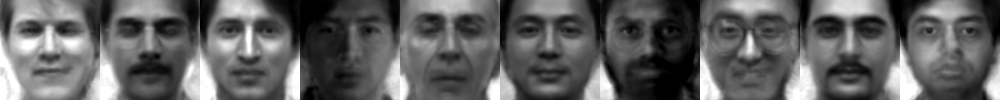

In [22]:
#降维前
print('降维前原始图片')
ims = [Image.open('./yaleface/s'+str((i+1)*10)+'.bmp') for i in range(10)]
width,height = ims[0].size
result1 = Image.new(ims[0].mode,(width*len(ims),height))
for j, im in enumerate(ims):
    result1.paste(im,box=(j*width,0))
display(result1)
#降维后
print('降维后重构图片')
ims = [Image.open('./output/s'+str((i+1)*10)+'.png') for i in range(10)]
width,height = ims[0].size
result2 = Image.new(ims[0].mode,(width*len(ims),height))
for j, im in enumerate(ims):
    result2.paste(im,box=(j*width,0))
display(result2)